# Formatting data

In [19]:
suppressMessages(library(Seurat))
suppressMessages(library(loomR))
suppressMessages(library(SeuratDisk))
suppressMessages(library(cowplot))
suppressMessages(library(patchwork))
suppressMessages(library(tidyverse))
theme_set(theme_cowplot())

In [13]:
# Read in the R object
dat <- readRDS("../../../data/mouse_adrenal/auxiliary_data/snrna/adrenal_Parse_10x_integrated.rds")

# EDA

In [14]:
# Peak at the metadata
head(dat[[]])

,orig.ident,nCount_RNA,nFeature_RNA,cellID,doublet_scores,doublets,library_accession,technology,species,tissue,⋯,Myeloid_membership_score,Sox10._membership_score,Fibroblast_membership_score,Medulla_membership_score,Stromal_membership_score,Smooth_muscle_membership_score,Capsule_membership_score,Hepatocyte_membership_score,Myonuclei_membership_score,gen_celltype_membership_score
,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACAGCCAATATACC.ENCLB069PRB,SeuratProject,5747,2731,AAACAGCCAATATACC.ENCLB069PRB,0.09895227,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,5.011310,3.549678,10.335827,11.43205,7.882373,0.8004176,1.426831,4.471898,1.131025,1.131025
AAACAGCCATGGCCCA.ENCLB069PRB,SeuratProject,4290,2376,AAACAGCCATGGCCCA.ENCLB069PRB,0.06472197,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,8.111888,3.449883,11.771562,10.72261,11.561772,1.4452214,2.587413,7.202797,1.398601,1.398601
AAACATGCAAAGCTCC.ENCLB069PRB,SeuratProject,14701,4981,AAACATGCAAAGCTCC.ENCLB069PRB,0.04960000,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,5.945174,3.394327,9.904088,10.29182,7.679750,0.8434800,1.754983,5.781920,1.054350,1.054350
AAACATGCAACTAGGG.ENCLB069PRB,SeuratProject,3551,1904,AAACATGCAACTAGGG.ENCLB069PRB,0.04400607,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,5.941988,3.858068,11.095466,10.56041,6.983948,0.8448324,1.154604,7.856942,2.224725,2.224725
AAACATGCAGCAATAA.ENCLB069PRB,SeuratProject,2531,1429,AAACATGCAGCAATAA.ENCLB069PRB,0.10545455,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,21.493481,4.385618,11.853023,12.84077,10.430660,1.0272620,2.647175,7.072303,2.252074,2.252074
AAACCAACAACAGCCT.ENCLB069PRB,SeuratProject,8580,3782,AAACCAACAACAGCCT.ENCLB069PRB,0.17894737,False,ENCLB069PRB,10x,Bl6/Cast,Adrenal,⋯,6.561772,6.363636,8.916084,10.62937,8.811189,1.3170163,2.074592,7.494172,1.258741,1.258741


In [17]:
colnames(dat[[]])

[1] "orig.ident"                     "nCount_RNA"                    
 [3] "nFeature_RNA"                   "cellID"                        
 [5] "doublet_scores"                 "doublets"                      
 [7] "library_accession"              "technology"                    
 [9] "species"                        "tissue"                        
[11] "sex"                            "timepoint"                     
[13] "rep"                            "sample"                        
[15] "depth1"                         "depth2"                        
[17] "experiment"                     "experiment_batch"              
[19] "integration_batch"              "run_number"                    
[21] "experiment_accession"           "file_accession"                
[23] "lower_nCount_RNA"               "upper_nCount_RNA"              
[25] "lower_nFeature_RNA"             "upper_doublet_scores"          
[27] "upper_percent.mt"               "percent.mt"                    
[29] "percent.ribo"                   "nCount_SCT"                    
[31] "nFeature_SCT"                   "integrated_snn_res.1.6"        
[33] "seurat_clusters"                "S.Score"                       
[35] "G2M.Score"                      "Phase"                         
[37] "subtypes"                       "celltypes"                     
[39] "gen_celltype"                   "Cortex_membership_score"       
[41] "Endothelial_membership_score"   "Adipocytes_membership_score"   
[43] "Myeloid_membership_score"       "Sox10._membership_score"       
[45] "Fibroblast_membership_score"    "Medulla_membership_score"      
[47] "Stromal_membership_score"       "Smooth_muscle_membership_score"
[49] "Capsule_membership_score"       "Hepatocyte_membership_score"   
[51] "Myonuclei_membership_score"     "gen_celltype_membership_score"

In [ ]:
umap_theme <- function(){
  theme(
    axis.line=element_blank(),
    axis.text.x=element_blank(),
    axis.text.y=element_blank(),
    axis.ticks=element_blank(),
    axis.title.x=element_blank(),
    axis.title.y=element_blank(),
    panel.background=element_blank(),
    panel.border=element_blank(),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(),
    plot.background=element_blank(),
    plot.title = element_text(hjust = 0.5)
  )
}

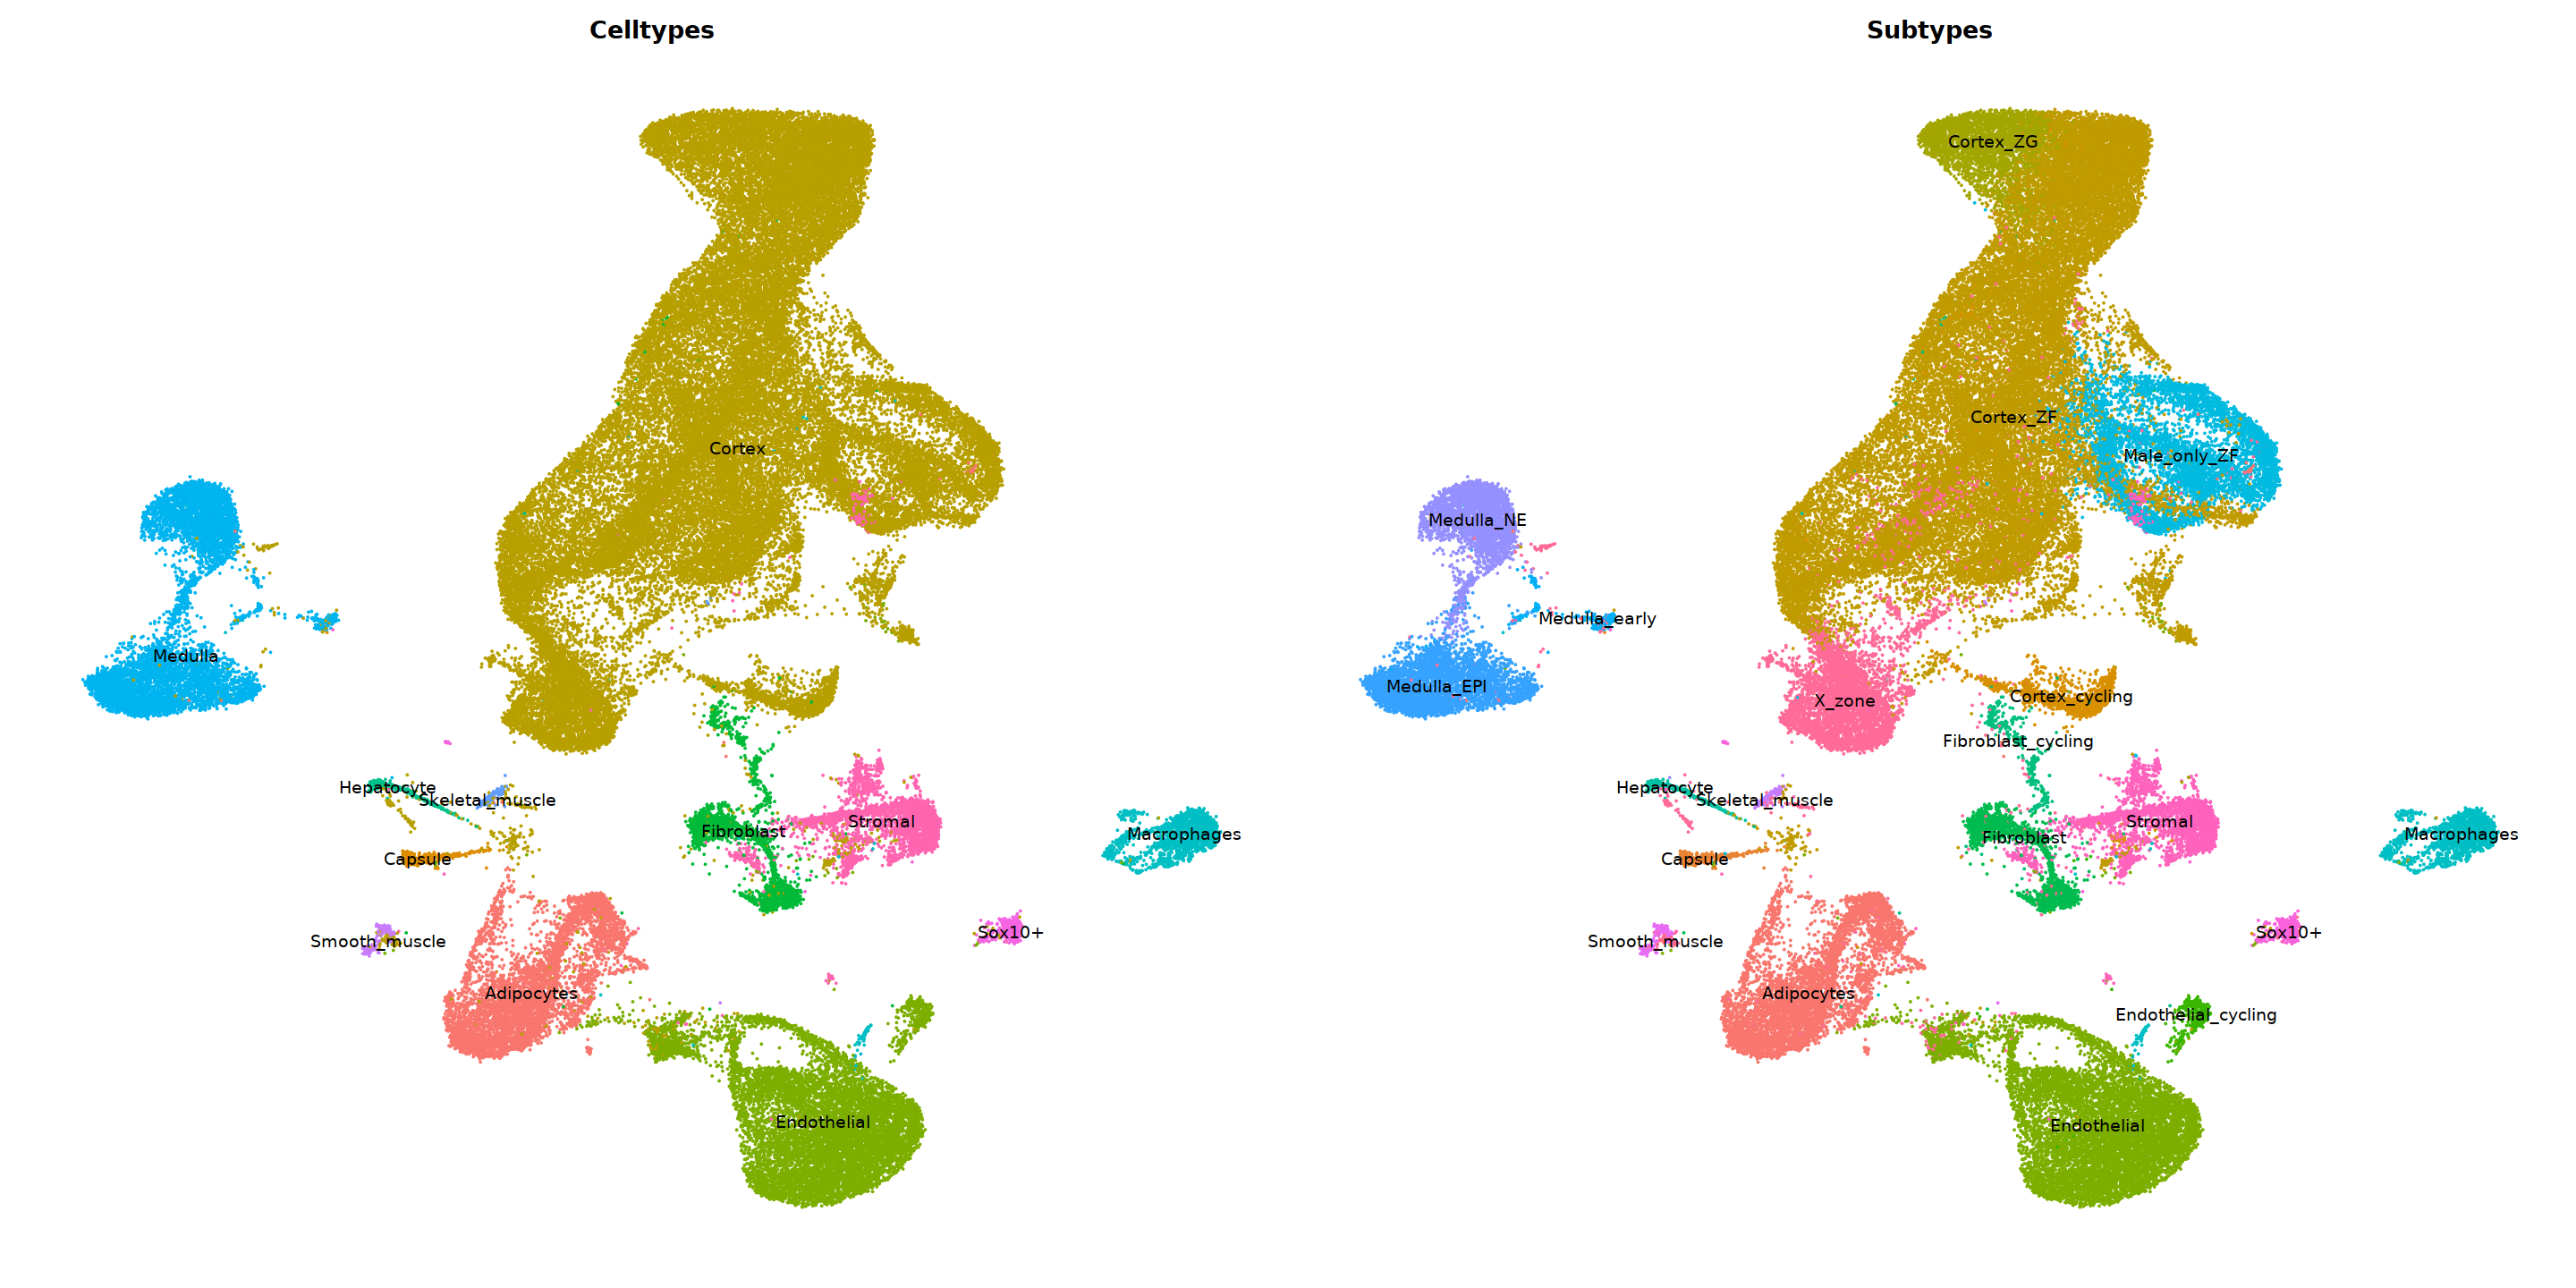

In [35]:
# Look at the clustering
options(repr.plot.width=24, repr.plot.height=12)
p1 <- DimPlot(dat, group.by='celltypes', reduction="umap", label=TRUE) +
   umap_theme() + ggtitle('Celltypes') + NoLegend()
p2 <- DimPlot(dat, group.by='subtypes', reduction="umap", label=TRUE) +
   umap_theme() + ggtitle('Subtypes') + NoLegend()
p1 + p2

In [38]:
table(dat$celltypes, dat$subtypes)

                 
                  Adipocytes Capsule Cortex_cycling Cortex_ZF Cortex_ZG
  Adipocytes            5650       0              0         0         0
  Capsule                  0     370              0         0         0
  Cortex                   0       0           1471     31553      3215
  Endothelial              0       0              0         0         0
  Fibroblast               0       0              0         0         0
  Hepatocyte               0       0              0         0         0
  Macrophages              0       0              0         0         0
  Medulla                  0       0              0         0         0
  Skeletal_muscle          0       0              0         0         0
  Smooth_muscle            0       0              0         0         0
  Sox10+                   0       0              0         0         0
  Stromal                  0       0              0         0         0
                 
                  Endothelia

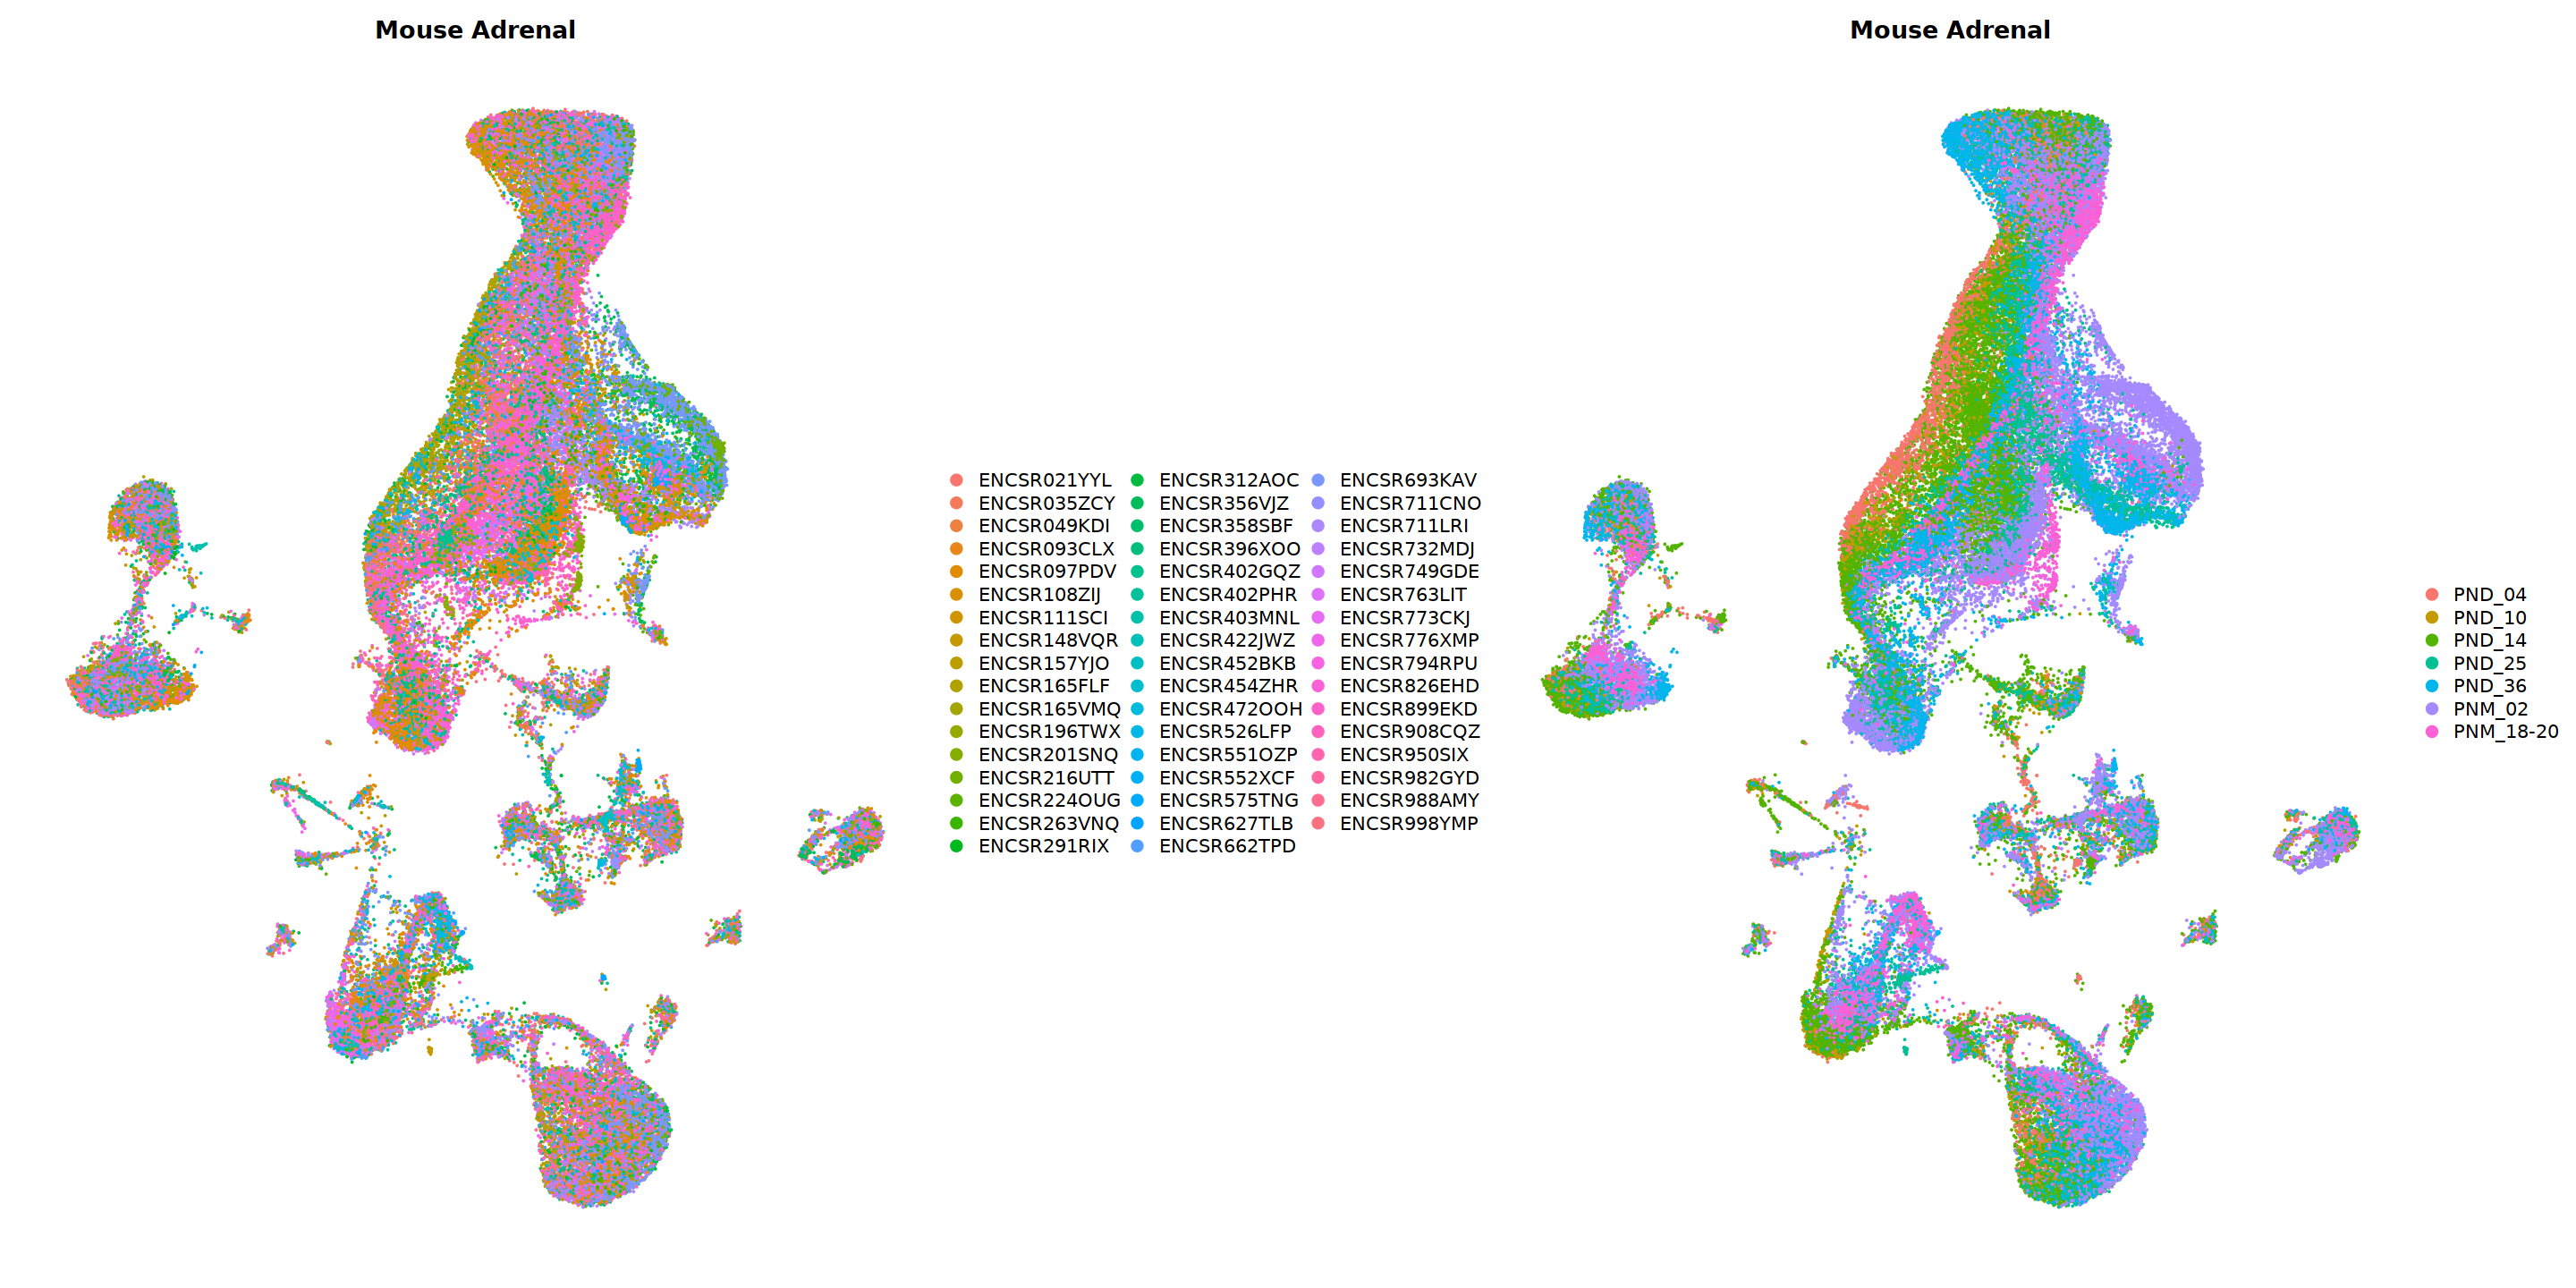

In [36]:
# Look at the clustering
options(repr.plot.width=24, repr.plot.height=12)
p1 <- DimPlot(dat, group.by='experiment_accession', reduction="umap") +
   umap_theme() + ggtitle('Mouse Adrenal')
p2 <- DimPlot(dat, group.by='timepoint', reduction="umap") +
   umap_theme() + ggtitle('Mouse Adrenal')
p1 + p2

In [39]:
dat

An object of class Seurat 
82892 features across 79209 samples within 3 assays 
Active assay: SCT (32171 features, 0 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

# File conversions

In [8]:
# What can I grab?
names(dat)

[1] "RNA"            "SCT"            "integrated"     "integrated_nn" 
[5] "integrated_snn" "pca"            "umap"

## RNA counts for all

In [2]:
# Grab only the RNA counts
rna_dat <- DietSeurat(dat, assays=c("RNA"))
print(names(rna_dat))
rna_dat

ERROR: Error in is(x, "classRepresentation"): object 'dat' not found


### h5Seurat

In [41]:
SaveH5Seurat(rna_dat, filename = "../../data/mouse_adrenal/preprocessed/snrna/adrenal_Parse_10x_integrated_RNA.h5Seurat")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



### h5ad (AnnData)

In [42]:
Convert("../../data/mouse_adrenal/preprocessed/snrna/adrenal_Parse_10x_integrated_RNA.h5Seurat", dest = "h5ad")

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



### Loom

In [ ]:
loom.file <- as.loom(rna_dat, filename = "../../data/mouse_adrenal/preprocessed/snrna/adrenal_Parse_10x_integrated.loom", verbose = TRUE)
loom.file$close_all()

Saving data from RNA as /matrix

